# Init y load de la librerias

In [ ]:
!pip install ultralytics --upgrade


# Creacion del fichero dataset.yaml

Este código configura y verifica un dataset YOLO en Google Drive, creando un archivo dataset.yaml necesario para entrenar modelos. Define las rutas de entrenamiento y validación, así como las clases del modelo (Casco, Chaleco, etc.). Si no encuentra el archivo YAML, lo genera automáticamente.


In [ ]:
import os
from google.colab import drive

# Función para crear el archivo YAML
# Nota: Si ya tienen un archivo `dataset.yaml` en su configuración,
# no necesitan ejecutar esta función.
def create_yaml(ruta_dataset, clases):
    """
    Crea el archivo YAML necesario para entrenar el modelo YOLO.
    Define las rutas de entrenamiento y validación, el número de clases y sus nombres.
    """
    contenido_yaml = f"""
    train: {os.path.join(ruta_dataset, 'train')}
    val: {os.path.join(ruta_dataset, 'valid')}

    nc: {len(clases)}  # Número de clases
    names: {clases}  # Lista de clases
    """
    ruta_yaml = os.path.join(ruta_dataset, 'dataset.yaml')
    with open(ruta_yaml, 'w') as archivo_yaml:
        archivo_yaml.write(contenido_yaml)
    print(f"✅ Archivo dataset.yaml creado en: {ruta_yaml}")
    return ruta_yaml
# Número de clases
drive.mount('/content/drive')

# Ruta al directorio que contiene el dataset (padre de train, valid, test)
# Nota: Cambien esta ruta a su configuración local si no usan Google Drive.
dataset_path = '/content/drive/My Drive/TFM DATASET YOLO'

# Verificar si el directorio existe, si no, crearlo
if not os.path.exists(ruta_dataset):
    os.makedirs(ruta_dataset)

# Definir las clases
# Nota: Estas son las clases del modelo. Cambien o amplíen según su dataset.
clases = ['Casco', 'Chaleco', 'No-Casco', 'No-Chaleco', 'Persona']

# Ruta al archivo YAML
# Nota: Verifiquen si ya tienen un archivo `dataset.yaml` en su configuración.
ruta_yaml = os.path.join(ruta_dataset, 'dataset.yaml')

# Verificar si el archivo YAML existe, si no, crearlo
if not os.path.exists(ruta_yaml):
    print(f"Archivo {ruta_yaml} no encontrado. Creando el archivo...")
    ruta_yaml = create_yaml(ruta_dataset, clases)
else:
    print(f"✅ El archivo {ruta_yaml} ya existe. No es necesario crearlo nuevamente.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ El archivo /content/drive/My Drive/TFM DATASET YOLO/dataset.yaml ya existe. No es necesario crearlo nuevamente.


Este script valida la existencia de los directorios train y valid, necesarios para entrenar y validar el modelo YOLO. Enumera el contenido de cada directorio si existen, o informa de su ausencia para que puedan ser creados manualmente. Asegura que la configuración del dataset sea correcta.

In [ ]:
# Verificar la existencia de las carpetas 'train' y 'valid'
!pwd

train_path = os.path.join(dataset_path, 'train')
valid_path = os.path.join(dataset_path, 'valid')

if not os.path.exists(train_path):
    print(f"La carpeta 'train' no existe: {train_path}")
else:
    print(f"La carpeta 'train' contiene: {os.listdir(train_path)}")

if not os.path.exists(valid_path):
    print(f"La carpeta 'valid' no existe: {valid_path}")
else:
    print(f"La carpeta 'valid' contiene: {os.listdir(valid_path)}")



/content
Le dossier train contient : ['_darknet.labels', 'images', 'labels', 'labels.cache']
Le dossier valid contient : ['images', 'labels', 'labels.cache']


Crea el archivo dataset.yaml necesario para entrenar un modelo YOLO.


  """
    Valida que cada imagen en el dataset tenga una anotación correspondiente y viceversa.


# Verificación y Estructuración del Dataset para YOLO
Este código verifica la consistencia del dataset utilizado para entrenar un modelo YOLO. Asegura que las carpetas train y valid contengan imágenes y sus respectivas anotaciones en formato .txt. Si detecta problemas, genera una lista detallada de errores; de lo contrario, muestra un mensaje indicando que todo está correcto.

TFM DATASET YOLO/             # Carpeta principal del dataset
│
├── train/                   # Datos para el entrenamiento
│   ├── images/              # Carpeta con imágenes de entrenamiento
│   │   ├── image1.jpg       # Ejemplo de imagen
│   │   ├── image2.jpg
│   │   └── ...              # Más imágenes
│   └── labels/              # Carpeta con anotaciones correspondientes
│       ├── image1.txt       # Anotación para image1.jpg
│       ├── image2.txt
│       └── ...              # Más archivos de anotaciones
│
├── valid/                   # Datos para la validación
│   ├── images/              # Carpeta con imágenes de validación
│   │   ├── image1.jpg       # Ejemplo de imagen
│   │   ├── image2.jpg
│   │   └── ...              # Más imágenes
│   └── labels/              # Carpeta con anotaciones correspondientes
│       ├── image1.txt       # Anotación para image1.jpg
│       ├── image2.txt
│       └── ...              # Más archivos de anotaciones
│
├── test_images/             # (Opcional) Imágenes para pruebas
│   ├── test1.jpg
│   ├── test2.jpg
│   └── ...
│
└── dataset.yaml             # Archivo de configuración YAML para YOLO

-Requisito esencial: La estructura debe ser coherente para que YOLO pueda procesar el dataset correctamente.
-Ubicación del dataset.yaml: El archivo debe estar ubicado en la raíz del dataset y correctamente configurado.
-Consistencia de nombres: Cada imagen en images/ debe tener un archivo de anotación con el mismo nombre en labels/ (por ejemplo, image1.jpg y image1.txt).

Este esquema asegura poder estructurar el dataset de manera correcta y evitar problemas durante el entrenamiento del modelo YOLO


In [ ]:
import os

def validate_dataset(dataset_path):

    # Lista para almacenar los problemas detectados
    issues = []

    # Validar las subcarpetas 'train' y 'valid'
    for split in ['train', 'valid']:
        # Rutas a las carpetas de imágenes y anotaciones
        images_dir = os.path.join(dataset_path, split, 'images')
        labels_dir = os.path.join(dataset_path, split, 'labels')

        # Verificar si las carpetas existen
        if not os.path.exists(images_dir):
            issues.append(f"La carpeta de imágenes no existe: {images_dir}")
            continue  # Continuar con la siguiente carpeta
        if not os.path.exists(labels_dir):
            issues.append(f"La carpeta de anotaciones no existe: {labels_dir}")
            continue

        # Listar los archivos en las carpetas (solo extensiones válidas)
        images = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))}
        labels = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.lower().endswith('.txt')}

        # Detectar imágenes sin anotaciones y anotaciones sin imágenes
        missing_labels = images - labels  # Imágenes sin archivo .txt
        missing_images = labels - images  # Archivos .txt sin imagen

        # Agregar problemas encontrados a la lista de errores
        if missing_labels:
            issues.append(f"En '{split}': Faltan anotaciones para las imágenes: {', '.join(missing_labels)}")
        if missing_images:
            issues.append(f"En '{split}': Faltan imágenes para las anotaciones: {', '.join(missing_images)}")

    # Si se detectaron problemas, lanzar una excepción con detalles
    if issues:
        raise ValueError("\n".join(issues))

    # Si todo está correcto, mostrar mensaje de éxito
    print("Validación del dataset completada con éxito. No se detectaron problemas.")

# Ruta al dataset principal
dataset_path = "/content/drive/My Drive/TFM DATASET YOLO"

# Validar el dataset
try:
    validate_dataset(dataset_path)
except ValueError as e:
    print(f"Errores detectados durante la validación:\n{e}")




Validación del dataset completada con éxito. No se detectaron problemas.


In [ ]:
import os
import torch
from ultralytics import YOLO
# Vérification de la disponibilité du GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositif utilisé : {device}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dispositif utilisé : cpu



# Entrenamiento de un modelo YOLOV8
Este código entrena un modelo YOLOv8 utilizando un archivo de configuración YAML y un dataset predefinido. Una vez completado el entrenamiento, verifica la presencia de los archivos de peso best.pt y last.pt generados durante el proceso. Permite configurar parámetros clave como el número de épocas y el tamaño de las imágenes para ajustar el entrenamiento según sea necesario.

Se asegura de que el archivo YAML exista antes de comenzar y notifica sobre cualquier archivo de peso que falte al finalizar el entrenamiento.

In [ ]:
import os
from ultralytics import YOLO

# Definir parámetros
project_name = 'YOLOv8-TFM'
run_name = 'run_local'
yaml_file_path = '/content/drive/My Drive/TFM DATASET YOLO/dataset.yaml'

# Verificar el archivo YAML
if not os.path.exists(yaml_file_path):
    raise FileNotFoundError(f"❌ El archivo dataset.yaml no se encuentra: {yaml_file_path}")
else:
    print(f"✅ Archivo dataset.yaml encontrado: {yaml_file_path}")

# Inicializar y entrenar el modelo
print("\n=== Inicio del entrenamiento YOLO ===")
model = YOLO('yolov8n.pt')
results = model.train(
    data=yaml_file_path,
    epochs=20,  # Ajustar el número de épocas según sea necesario
    imgsz=640,
    project=project_name,
    name=run_name,
    save=True,
    save_period=1,
    verbose=True
)
print(f"\n✅ Entrenamiento completado. Los resultados están guardados en './{project_name}/{run_name}'.")

# Verificar los archivos `best.pt` y `last.pt`
weights_dir = os.path.join(f'./{project_name}', run_name, 'weights')
files_to_check = ['best.pt', 'last.pt']

print("\n=== Verificación de archivos generados ===")
for file_name in files_to_check:
    file_path = os.path.join(weights_dir, file_name)
    if os.path.exists(file_path):
        print(f"✅ {file_name} encontrado en {weights_dir}")
    else:
        print(f"❌ {file_name} no se encuentra en {weights_dir}")

    print("Aucun fichier best.pt disponible pour la validation.")


#Validación del Modelo YOLO V8
Este script permite la gestión de un flujo de trabajo relacionado con el entrenamiento y validación de modelos YOLO. Incluye funciones para subir archivos de pesos desde el sistema local a un directorio en Colab, buscar el archivo más relevante (best.pt) y cargar el modelo YOLO para realizar la validación utilizando un archivo YAML del conjunto de datos. También verifica métricas clave como precisión, recall y mAP para evaluar el rendimiento del modelo.

In [ ]:
# Part 1: Gestión de imports y funciones comunes
# ==============================================

# Importamos las bibliotecas necesarias
import os
from ultralytics import YOLO  # Para cargar y validar el modelo YOLO
from google.colab import files  # Para subir archivos desde el sistema local

# Función para crear un directorio si no existe
def create_directory(directory_path):
    """
    Crea un directorio si no existe.

    Parámetros:
    - directory_path (str): Ruta del directorio a crear.
    """
    os.makedirs(directory_path, exist_ok=True)
    print(f"✅ Directorio verificado/creado: {directory_path}")

# Función para subir archivos de pesos
def upload_weights(uploaded_weights_dir='./uploaded_weights'):
    """
    Permite al usuario subir archivos desde su computadora y los guarda en un directorio específico.

    Parámetros:
    - uploaded_weights_dir (str): Directorio donde se guardarán los archivos subidos.

    Retorna:
    - Ruta del directorio donde se guardaron los archivos.
    """
    create_directory(uploaded_weights_dir)
    print("\n=== Subir archivos de pesos ===")
    uploaded_files = files.upload()  # Subimos los archivos desde el sistema local
    for file_name in uploaded_files.keys():
        file_path = os.path.join(uploaded_weights_dir, file_name)
        with open(file_path, 'wb') as f:  # Guardamos los archivos en el directorio destino
            f.write(uploaded_files[file_name])
        print(f"✅ Archivo {file_name} guardado en: {file_path}")
    return uploaded_weights_dir

# Función para cargar un modelo YOLO
def load_model(weight_path):
    """
    Carga un modelo YOLO desde un archivo de pesos.

    Parámetros:
    - weight_path (str): Ruta del archivo de pesos.

    Retorna:
    - Objeto del modelo YOLO cargado.
    """
    if not os.path.exists(weight_path):
        raise FileNotFoundError(f"❌ Archivo no encontrado: {weight_path}")
    print(f"✅ Cargando modelo desde: {weight_path}")
    return YOLO(weight_path)

# Función para buscar un archivo `best.pt` o similar en un directorio
def find_best_weight(uploaded_weights_dir='./uploaded_weights'):
    """
    Busca el archivo `best.pt` o uno similar (como `best (1).pt`) en un directorio.

    Parámetros:
    - uploaded_weights_dir (str): Directorio donde buscar el archivo.

    Retorna:
    - Ruta completa del archivo encontrado.
    """
    # Buscar todos los archivos .pt en el directorio
    pt_files = [f for f in os.listdir(uploaded_weights_dir) if f.endswith('.pt')]
    if not pt_files:
        raise FileNotFoundError("❌ Ningún archivo `.pt` encontrado. Por favor, súbelo.")

    # Buscar el archivo que contiene "best" en su nombre
    for file_name in pt_files:
        if 'best' in file_name:
            best_weight = os.path.join(uploaded_weights_dir, file_name)
            print(f"✅ Archivo de pesos detectado: {best_weight}")
            return best_weight

    raise FileNotFoundError("❌ Archivo `best.pt` no encontrado. Por favor, súbelo.")

# Part 2: Ejecución del flujo principal
# ================================================

# Directorio para subir archivos de pesos
uploaded_weights_dir = upload_weights()

# Verificar los archivos en el directorio
print("📂 Contenido del directorio de archivos subidos:")
print(os.listdir(uploaded_weights_dir))

try:
    # Buscar y cargar el archivo `best.pt` o uno similar
    best_weight_path = find_best_weight(uploaded_weights_dir)
    model = load_model(best_weight_path)

    # Ruta del archivo YAML del conjunto de datos
    yaml_file_path = '/content/drive/My Drive/TFM DATASET YOLO/dataset.yaml'
    if not os.path.exists(yaml_file_path):
        raise FileNotFoundError(f"❌ Archivo YAML no encontrado: {yaml_file_path}")
    print(f"✅ Archivo YAML encontrado: {yaml_file_path}")

    # Validar el modelo
    print("\n=== Iniciando la validación del modelo ===")
    results = model.val(
        data=yaml_file_path,  # Ruta del conjunto de datos utilizado para la validación
        imgsz=640,           # Tamaño de las imágenes utilizadas
        save=True            # Guardar los resultados de la validación
    )

    # Mostrar métricas de validación
    print("\n=== Resultados de la validación ===")
    print(f"📊 Precisión (P): {results.box.mp:.2f}")
    print(f"📊 Recall (R): {results.box.mr:.2f}")
    print(f"📊 mAP@50: {results.box.map50:.2f}")
    print(f"📊 mAP@50-95: {results.box.map:.2f}")

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Directorio verificado/creado: ./uploaded_weights

=== Subir archivos de pesos ===


Saving best.pt to best.pt
✅ Archivo best.pt guardado en: ./uploaded_weights/best.pt
📂 Contenido del directorio de archivos subidos:
['best.pt']
✅ Archivo de pesos detectado: ./uploaded_weights/best.pt
✅ Cargando modelo desde: ./uploaded_weights/best.pt
✅ Archivo YAML encontrado: /content/drive/My Drive/TFM DATASET YOLO/dataset.yaml

=== Iniciando la validación del modelo ===
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]
val: Scanning /content/drive/My Drive/TFM DATASET YOLO/valid/labels.cache... 555 images, 31 backgrounds, 0 corrupt: 100%|██████████| 555/555 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [03:13<00:00,  5.53s/it]


                   all        555       4651      0.848       0.64      0.729      0.459
                 Casco        275        712      0.896      0.632      0.707      0.418
               Chaleco        276        718      0.849      0.624      0.721      0.435
              No-Casco        272        465      0.846      0.596      0.688      0.409
            No-Chaleco        378        784      0.808       0.64      0.729      0.473
               Persona        523       1972      0.839      0.708      0.797      0.561
Speed: 9.6ms preprocess, 305.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val

=== Resultados de la validación ===
📊 Precisión (P): 0.85
📊 Recall (R): 0.64
📊 mAP@50: 0.73
📊 mAP@50-95: 0.46


# Análisis Detallado de Métricas YOLO por Clase
Este bloque analiza las métricas de validación YOLO por clase, incluyendo precisión, recall, mAP@50 y mAP@50-95. Evalúa el rendimiento de cada clase y proporciona una interpretación basada en los valores de las métricas, identificando si el modelo necesita ajustes o si tiene un buen desempeño. Es una herramienta útil para identificar fortalezas y debilidades en el rendimiento del modelo por categoría.

Precisión (P): Indica qué tan exacto es el modelo al detectar objetos, mostrando la proporción de detecciones correctas sobre el total de predicciones realizadas.

Recall (R): Mide la capacidad del modelo para encontrar todos los objetos relevantes en las imágenes.

mAP@50: Representa la precisión promedio del modelo usando un umbral de coincidencia (IoU) del 50%.

mAP@50-95: Evalúa la precisión promedio en un rango de umbrales (50% a 95%), proporcionando una evaluación más completa del rendimiento.

In [ ]:
# Bloque para analizar las métricas YOLO por clase
def analyze_class_metrics(results):
    """
    Analiza las métricas de validación YOLO para cada clase y muestra el estado por clase.
    """
    print("\n=== Análisis de métricas por clase ===\n")

    # Acceder a los nombres de las clases y métricas
    for i, class_name in results.names.items():
        # Obtener las métricas por clase
        class_metrics = results.box.class_result(i)  # Devuelve [precision, recall, ap50, ap50-95]
        precision = class_metrics[0]
        recall = class_metrics[1]
        map50 = class_metrics[2]
        map50_95 = class_metrics[3]

        # Mostrar las métricas por clase
        print(f"=== Clase: {class_name} ===")
        print(f"📊 Precisión (P): {precision:.2f}")
        print(f"📊 Recall (R): {recall:.2f}")
        print(f"📊 mAP@50: {map50:.2f}")
        print(f"📊 mAP@50-95: {map50_95:.2f}")

        # Estado basado en las métricas
        print("\n=== Estado de la clase ===")
        if precision > 0.8 and recall > 0.6:
            print("✅ Buen rendimiento: Alta precisión y recall aceptable.")
        elif precision > 0.8:
            print("⚠️ Alta precisión, pero bajo recall.")
        elif recall > 0.6:
            print("⚠️ Recall aceptable, pero precisión baja.")
        else:
            print("❌ Rendimiento insuficiente: Se necesitan ajustes.")
        print("\n" + "="*30 + "\n")

# Ejemplo de uso con los resultados de un modelo YOLO
try:
    # Validación del modelo (ejemplo)
    results = model.val(
        data=yaml_file_path,  # Ruta al archivo YAML del dataset
        imgsz=640,           # Tamaño de las imágenes usadas
        save=True            # Guardar los resultados
    )

    # Analizar las métricas por clase
    analyze_class_metrics(results)

except FileNotFoundError as e:
    print(f"Error: {e}")
except AttributeError as e:
    print(f"Error de atributo: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/My Drive/TFM DATASET YOLO/valid/labels.cache... 555 images, 31 backgrounds, 0 corrupt: 100%|██████████| 555/555 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [02:21<00:00,  4.04s/it]


                   all        555       4651      0.848       0.64      0.729      0.459
                 Casco        275        712      0.896      0.632      0.707      0.418
               Chaleco        276        718      0.849      0.624      0.721      0.435
              No-Casco        272        465      0.846      0.596      0.688      0.409
            No-Chaleco        378        784      0.808       0.64      0.729      0.473
               Persona        523       1972      0.839      0.708      0.797      0.561
Speed: 2.5ms preprocess, 234.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val4

=== Análisis de métricas por clase ===

=== Clase: Casco ===
📊 Precisión (P): 0.90
📊 Recall (R): 0.63
📊 mAP@50: 0.71
📊 mAP@50-95: 0.42

=== Estado de la clase ===
✅ Buen rendimiento: Alta precisión y recall aceptable.


=== Clase: Chaleco ===
📊 Precisión (P): 0.85
📊 Recall (R): 0.62
📊 mAP@50: 0.72
📊 mAP@50-95: 0.44

=== Estado de la clase ===
✅ 

# Visualización de predicciones YOLO

Este script carga un modelo YOLO previamente entrenado y genera predicciones sobre un conjunto de imágenes de test. Las imágenes con los resultados se guardan en un directorio especificado y se muestran directamente en el entorno. Además, se verifica que las imágenes de prueba existan y que el modelo cargado contenga un archivo de pesos con el prefijo "best".


=== Cargar el modelo YOLO ===
✅ Archivo best (10).pt guardado en: ./uploaded_weights/best (10).pt
✅ 6 imágenes encontradas. Generando predicciones...
✅ Cargando el modelo desde: ./uploaded_weights/best (10).pt

image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/IMG_8762-2-2-2.jpg: 640x640 1 No-Casco, 1 No-Chaleco, 1 Persona, 178.4ms
Speed: 4.2ms preprocess, 178.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
268 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


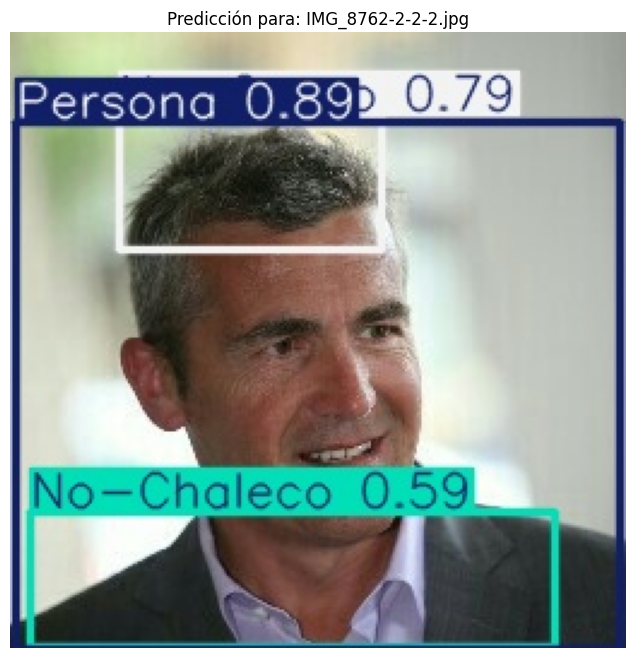


image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/Photo BCA 2.jpg: 640x448 1 No-Casco, 1 Persona, 130.0ms
Speed: 3.6ms preprocess, 130.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
268 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


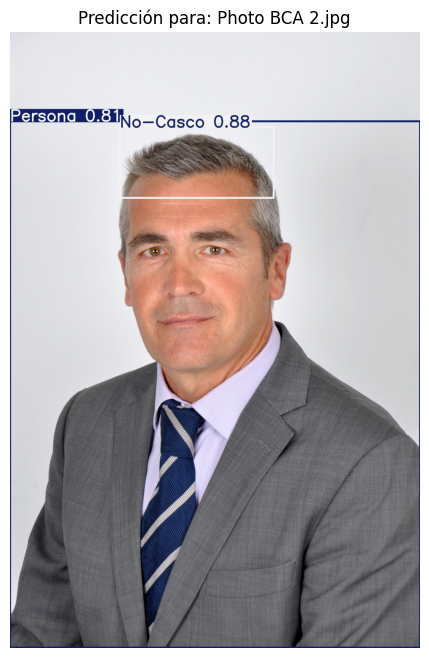


image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/IMG_20151020_214137.jpg: 640x480 1 No-Casco, 1 No-Chaleco, 1 Persona, 184.8ms
Speed: 5.2ms preprocess, 184.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
268 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


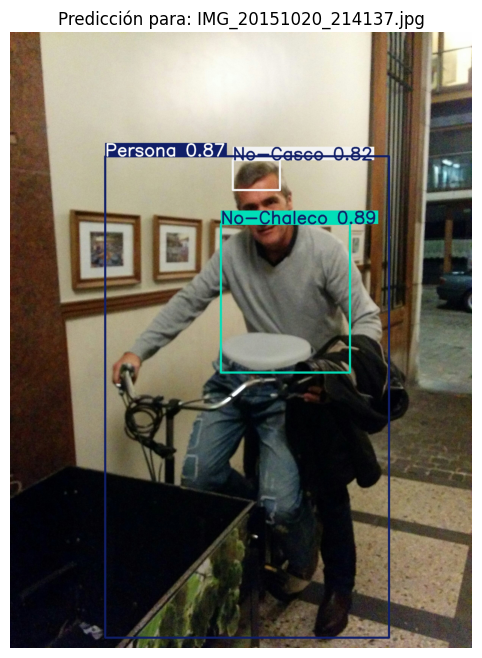


image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/DSC_0037.jpg: 640x448 1 No-Casco, 4 Personas, 127.2ms
Speed: 3.5ms preprocess, 127.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
268 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


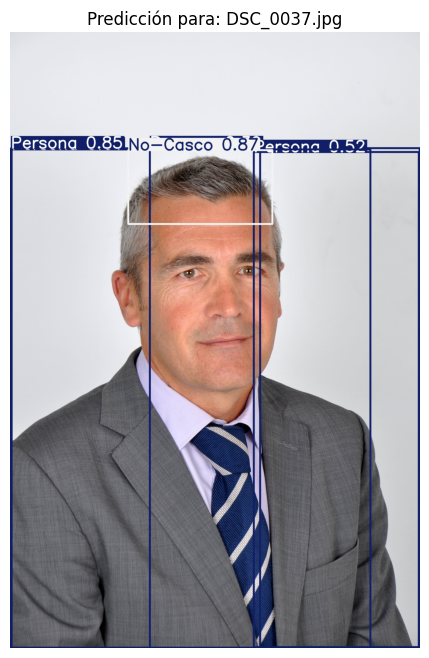


image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/DSC_0034.jpg: 640x448 1 No-Casco, 1 Persona, 130.0ms
Speed: 3.8ms preprocess, 130.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
268 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


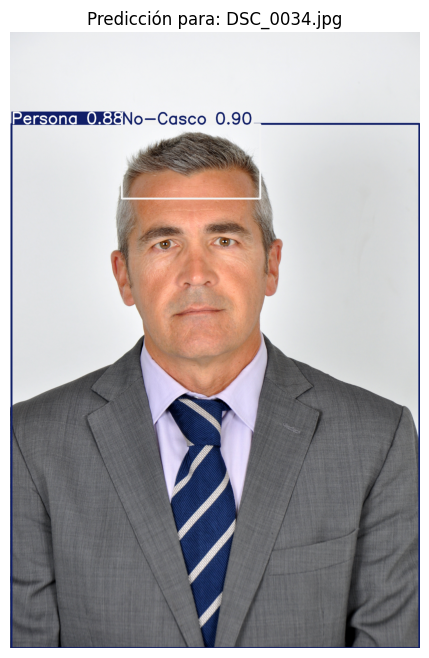


image 1/1 /content/drive/My Drive/TFM DATASET YOLO/test1/hard_hat_workers318.jpg: 640x640 2 Cascos, 2 Chalecos, 1 No-Chaleco, 2 Personas, 274.5ms
Speed: 4.8ms preprocess, 274.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions
269 labels saved to /content/drive/My Drive/TFM DATASET YOLO/predictions/predictions/labels


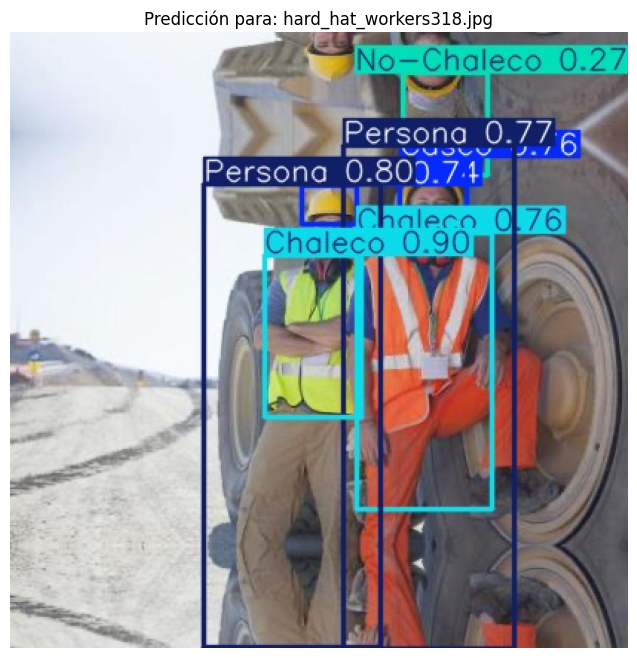

✅ Las predicciones se han guardado en: /content/drive/My Drive/TFM DATASET YOLO/predictions/


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from google.colab import files

# Directorio para cargar el archivo de pesos
# uploaded_weights_dir = './uploaded_weights'
# os.makedirs(uploaded_weights_dir, exist_ok=True)

# Subir el archivo de pesos
# print("\n=== Cargar el modelo YOLO ===")
# uploaded_files = files.upload()

# Detectar el archivo de pesos subido
best_weight_path = None
for file_name in uploaded_files.keys():
    file_path = os.path.join(uploaded_weights_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(uploaded_files[file_name])
    if "best" in file_name:
        best_weight_path = file_path
    print(f"✅ Archivo {file_name} guardado en: {file_path}")

if not best_weight_path:
    raise FileNotFoundError("❌ No se encontró ningún archivo con 'best' en el nombre entre los archivos subidos.")

# Configurar directorios
test_dir = '/content/drive/My Drive/TFM DATASET YOLO/test1'  # Directorio con imágenes de prueba
predictions_dir = '/content/drive/My Drive/TFM DATASET YOLO/predictions/'  # Directorio para guardar las predicciones

# Crear el directorio de predicciones si no existe
os.makedirs(predictions_dir, exist_ok=True)

# Verificar si el directorio de imágenes de prueba contiene imágenes
image_paths = glob.glob(os.path.join(test_dir, '*.jpg'))  # Procesar solo imágenes .jpg
if not image_paths:
    print(f"❌ No se encontraron imágenes en el directorio: {test_dir}")
    raise FileNotFoundError(f"❌ No se encontraron imágenes en el directorio: {test_dir}")
else:
    print(f"✅ {len(image_paths)} imágenes encontradas. Generando predicciones...")

# Cargar el modelo YOLO
print(f"✅ Cargando el modelo desde: {best_weight_path}")
model = YOLO(best_weight_path)

# Generar predicciones y mostrar resultados
for img_path in image_paths:
    # Realizar predicción
    results = model.predict(
        source=img_path,  # Imagen de entrada
        save=True,  # Guardar resultados
        save_txt=True,  # Guardar resultados en formato TXT (opcional)
        conf=0.25,  # Umbral de confianza para las predicciones
        project=predictions_dir,  # Directorio para guardar las predicciones
        name='predictions',  # Subdirectorio donde se organizan las predicciones
        exist_ok=True  # No sobrescribir directorios existentes
    )

    # Mostrar la imagen predicha
    predicted_image_path = os.path.join(predictions_dir, 'predictions', os.path.basename(img_path))
    if os.path.exists(predicted_image_path):
        predicted_image = Image.open(predicted_image_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(predicted_image)
        plt.axis('off')  # Ocultar ejes
        plt.title(f"Predicción para: {os.path.basename(img_path)}")
        plt.show()

print(f"✅ Las predicciones se han guardado en: {predictions_dir}")

